## El Problema
### Has sido contratado como asistente de an√°lisis de datos en Telecom X y formar√°s parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la p√©rdida de clientes.

### Tu desaf√≠o ser√° recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer informaci√≥n valiosa. A partir de tu an√°lisis, el equipo de Data Science podr√° avanzar en modelos predictivos y desarrollar estrategias para reducir la evasi√≥n.

#üìå Extracci√≥n

In [1]:
# Importamos las librerias necesarias para nuestro proyecto 
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

In [2]:
# Conociendo el df, recopilamos los datos de una fuente externa en este caso un archivo .json desde github
df = pd.read_json(r"https://raw.githubusercontent.com/ganv1/TelecomX_LATAM/refs/heads/main/TelecomX_Data.json")
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [3]:
# Exploraci√≥n inicial, antes de transformar los datos, revisemos su estructura y la informaci√≥n general del dataframe
print(df.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [4]:
# Verificamos la estructura del archivo json
import json
warnings.filterwarnings("ignore")
# Ver la estructura del JSON
with open(r"TelecomX_Data.json") as f:
    data = json.load(f)

# Mostramos  los 2 primeros registros con formato json con sangria  de 4 espacios para explorar la data de forma legible.

print(json.dumps(data[:2], indent=4))  

[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gen

In [ ]:

# Normalizamos la estructura del archivo JSON
df = pd.json_normalize(data)

# Visualizaci√≥n inicial

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
# Estadisticas generales del dataframe, para conocer los datos que contiene
print(df.describe())


       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
count             7267.000000      7267.000000              7267.000000
mean                 0.162653        32.346498                64.720098
std                  0.369074        24.571773                30.129572
min                  0.000000         0.000000                18.250000
25%                  0.000000         9.000000                35.425000
50%                  0.000000        29.000000                70.300000
75%                  0.000000        55.000000                89.875000
max                  1.000000        72.000000               118.750000


In [7]:
# Mostrar primeras filas del dataset
print(df.head(10))



   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   
5  0013-MHZWF    No          Female                       0               No   
6  0013-SMEOE    No          Female                       1              Yes   
7  0014-BMAQU    No            Male                       0              Yes   
8  0015-UOCOJ    No          Female                       1               No   
9  0016-QLJIS    No          Female                       0              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9

In [8]:
# Mostrar cantidad de valores nulos por columna
print(df.isnull().sum())


customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


#üîß Transformaci√≥n

In [ ]:
# Convertimos las variables de texto en valores num√©ricos para facilitar el procesamiento.
# Mapeamos variables categ√≥ricas a valores num√©ricos para facilitar su an√°lisis


df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["customer.gender"] = df["customer.gender"].map({"Female": 0, "Male": 1})
df["account.Contract"] = df["account.Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
df["account.PaperlessBilling"] = df["account.PaperlessBilling"].map({"Yes": 1, "No": 0})

In [10]:
# Convertir "account.Charges.Total" a num√©rico
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

# Eliminamos duplicados
df = df.drop_duplicates()

# Revisamos los cambios
print(df.info())  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   int64  
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Contar los valores de cada categor√≠a
churn_counts = df["Churn"].value_counts()

# Configurar el tama√±o de la figura
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
  

# Crear el gr√°fico de barras
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["blue", "red"])

# Etiquetas y t√≠tulo
plt.xlabel("Categor√≠a de Clientes", fontsize=12)
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.title("Distribuci√≥n de Clientes seg√∫n Churn", fontsize=14, fontweight="bold")


plt.show()

#üìä Carga y an√°lisis

In [12]:
# Guardamos un archivo csv para futuras consultas y/o an√°lisis

df.to_csv("DatosLimpios.csv", index=False)

1. Analisis demogr√°fico

In [13]:
demograficos = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents']
for var in demograficos:
    print(f"\nTasa de Perdida de Clientes por {var}:")
    print(df.groupby(var)['Churn'].mean().round(4)*100)


Tasa de Perdida de Clientes por customer.gender:
customer.gender
0    26.92
1    26.16
Name: Churn, dtype: float64

Tasa de Perdida de Clientes por customer.SeniorCitizen:
customer.SeniorCitizen
0    23.61
1    41.68
Name: Churn, dtype: float64

Tasa de Perdida de Clientes por customer.Partner:
customer.Partner
No     32.96
Yes    19.66
Name: Churn, dtype: float64

Tasa de Perdida de Clientes por customer.Dependents:
customer.Dependents
No     31.28
Yes    15.45
Name: Churn, dtype: float64


2. Analisis por Servicios contratados

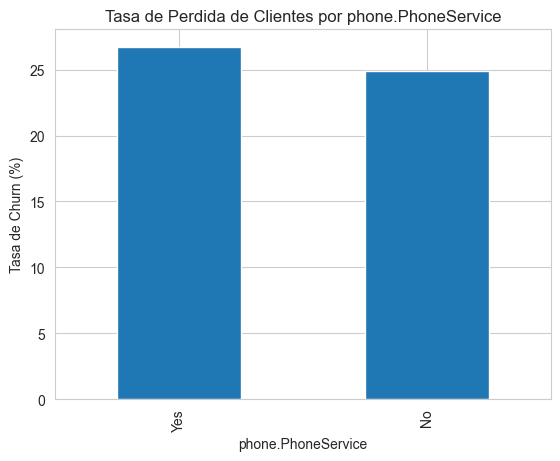

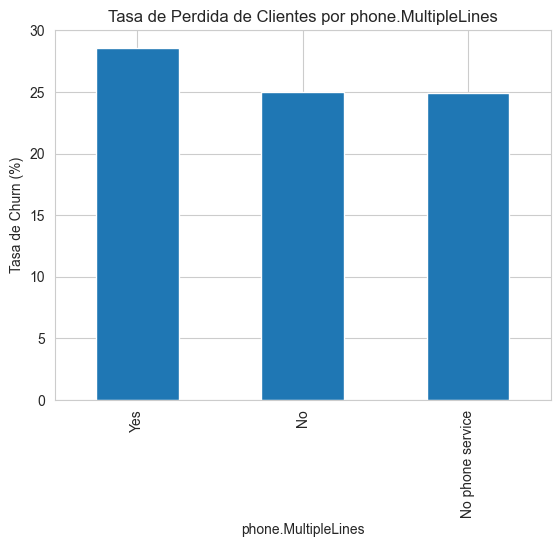

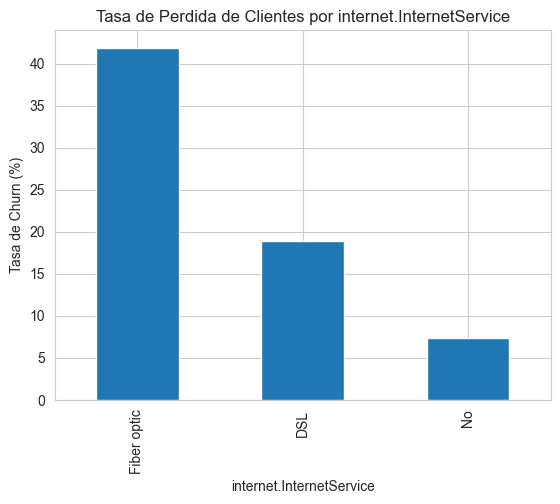

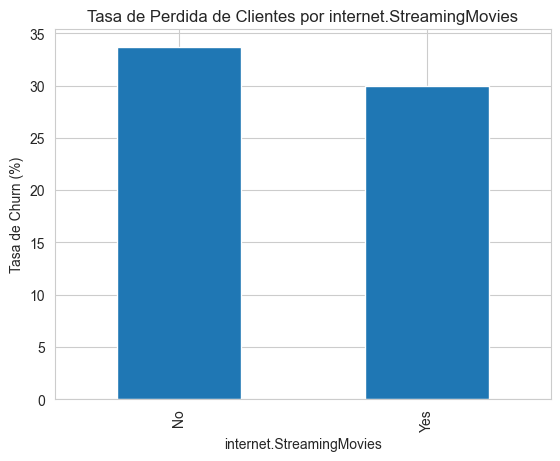

In [14]:
servicios = {
    'phone.PhoneService': ['Yes', 'No'],
    'phone.MultipleLines': ['No phone service', 'No', 'Yes'],
    'internet.InternetService': ['DSL', 'Fiber optic', 'No'],
    'internet.StreamingTV': ['No', 'Yes'],
    'internet.StreamingMovies': ['No', 'Yes']
}

for servicio, categorias in servicios.items():
    
    # Filtra solo las categor√≠as relevantes
    temp = df[df[servicio].isin(categorias)]
    
    # Calcular la tasa de Churn por categor√≠a
    churn_por_servicio = (
        temp.groupby(servicio)['Churn']
        .mean()
        .sort_values(ascending=False)
        .round(4) * 100
    )
    # Graficar 
    if len(churn_por_servicio) > 1:
        churn_por_servicio.plot(kind='bar', title=f'Tasa de Perdida de Clientes por {servicio}')
        plt.ylabel('Tasa de Churn (%)')
        plt.show()
    else:
        print(f"{servicio}:")
        print(churn_por_servicio)

3. Analisis de Servicios adicionales (Seguridad y protecci√≥n)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

addons = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport']

# Crear figura 
fig = make_subplots(rows=1, cols=len(addons), specs=[[{'type':'domain'}]*len(addons)],
                    subplot_titles=[f'Churn por {addon}' for addon in addons])

for i, addon in enumerate(addons, start=1):
    churn_rates = df.groupby(addon)['Churn'].mean().round(4) * 100
    
    
    if len(churn_rates) > 1:
        fig.add_trace(
            go.Pie(
                labels=churn_rates.index,
                values=churn_rates.values,
                textinfo='percent',
                hole=0.3  
            ),
            row=1, col=i
        )
    else:
        
        fig.layout.annotations[i-1].text += f"<br>{churn_rates.iloc[0]:.2f}%"

# Configurar fondo 
fig.update_layout(
    showlegend=False,
    height=400,
    width=1200,
    margin=dict(t=80, b=20, l=20, r=20),
    plot_bgcolor='rgba(0,0,0,0)',   
    paper_bgcolor='rgba(0,0,0,0)'   
)

fig.show()


Lo que podemos deducir a partir de estos  gr√°ficos es:
Servicios de seguridad y soporte reducen el churn:

- Los clientes que contratan servicios como OnlineSecurity, DeviceProtection y TechSupport suelen mostrar tasas de churn m√°s bajas. Esto indica que estos servicios agregan valor percibido y aumentan la satisfacci√≥n y fidelidad del cliente.

- Clientes que no tienen estos servicios adicionales presentan tasas de churn significativamente m√°s altas, lo que puede reflejar una percepci√≥n de menor protecci√≥n, soporte o beneficios, aumentando la probabilidad de que se vayan.

Servicios de respaldo en l√≠nea (OnlineBackup) pueden tener un efecto similar, aunque su impacto puede ser menor .



Analizamos si el gasto total influye en la cancelaci√≥n de clientes

In [16]:
# Vizualisamos el gasto total segun Perdida de clientes (Churn)
sns.histplot(df[df["Churn"] == 1]["account.Charges.Total"], bins=30, kde=True, color="red", label="Cliente perdido")
sns.histplot(df[df["Churn"] == 0]["account.Charges.Total"], bins=30, kde=True, color="blue", label="Cliente activo")
plt.legend()
plt.title("Distribuci√≥n de Total Gastado seg√∫n Churn")
plt.show()

- Distribucion de la Perdida de clientes segun tipo de contrato, 
- Observamos que los contratos  "mes a mes" , tienen  mayor tasa de perdida de clientes.
- (0 = mes a mes, 1 = un a√±o, 2 = dos a√±os)


In [17]:
# 4. An√°lisis de contratos y facturaci√≥n
contratos = df.groupby('account.Contract')['Churn'].mean().round(4)*100
facturacion = df.groupby('account.PaperlessBilling')['Churn'].mean().round(4)*100

print("\nChurn por tipo de contrato:")
print(contratos)
print("\nChurn por facturaci√≥n paperless:")
print(facturacion)


Churn por tipo de contrato:
account.Contract
0    42.71
1    11.27
2     2.83
Name: Churn, dtype: float64

Churn por facturaci√≥n paperless:
account.PaperlessBilling
0    16.33
1    33.57
Name: Churn, dtype: float64


- Los clientes con contratos a largo plazo (1 a√±o o 2 a√±os) tienden a tener una tasa de churn ligeramente menor que los clientes con contratos mes a mes.  - Esto sugiere que los contratos m√°s largos generan mayor compromiso y fidelidad, reduciendo la probabilidad de abandono.
- Los contratos mes a mes, aunque ofrecen mayor flexibilidad, presentan un mayor riesgo de churn debido a la facilidad para cancelar el servicio.

- Facturaci√≥n sin papel (PaperlessBilling)
- La preferencia por facturaci√≥n electr√≥nica (sin papel) no muestra una diferencia significativa en la tasa de churn respecto a la facturaci√≥n tradicional, - lo que indica que este factor por s√≠ solo no influye mucho en la retenci√≥n.

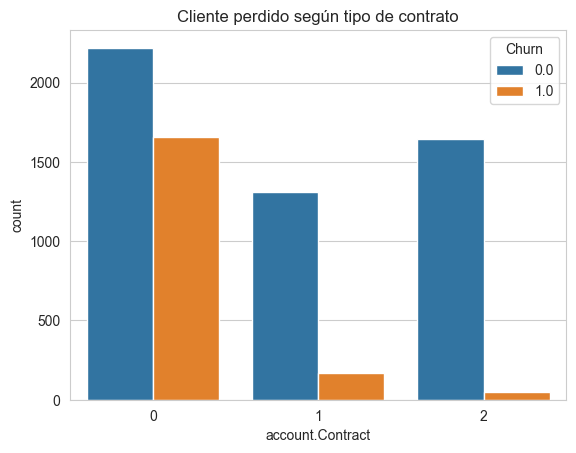

In [18]:
# Graficamos 
sns.countplot(data=df, x="account.Contract", hue="Churn")
plt.title("Cliente perdido seg√∫n tipo de contrato")
plt.show()

- Relaci√≥n entre tiempo de permanencia y estado del cliente
- Observamos que los clientes con menos tiempo de contrato tienen m√°s probabilidad de cancelar.

In [19]:

# Creamos  gr√°fico de boxplot
fig = px.box(df, x="Churn", y="customer.tenure", color="Churn",
             title="Relaci√≥n entre Tiempo de Permanencia y Estado del Cliente",
             labels={"Churn": "Estado del Cliente", "customer.tenure": "Tiempo de Permanencia (meses)"},
             color_discrete_map={0: "#2ca02c", 1: "#d62728"})

# Mejorar etiquetas en eje X
fig.update_xaxes(tickvals=[0, 1], ticktext=["Cliente Activo", "Cliente Perdido"])


fig.show()

- Distribucion de la Perdida de clientes por genero
- No se aprecia diferencia significativa en la tasa de abandono separado por genero

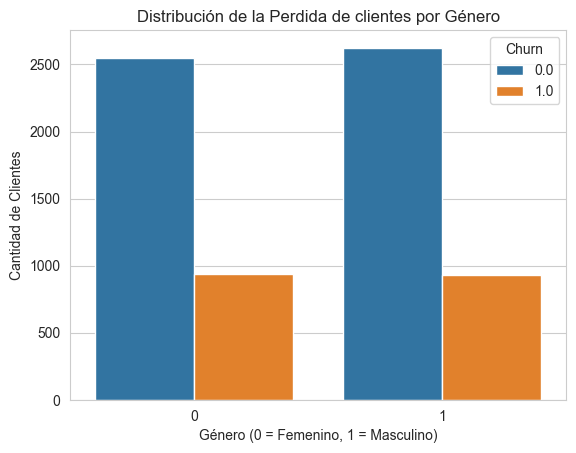

In [20]:

sns.countplot(data=df, x="customer.gender", hue="Churn")
plt.title("Distribuci√≥n de la Perdida de clientes por G√©nero")
plt.xlabel("G√©nero (0 = Femenino, 1 = Masculino)")
plt.ylabel("Cantidad de Clientes")
plt.show()

- Graficamos perdida de clientes segun tipo de contrato
- Observamos que los clientes con contratos m√°s cortos tienen mayor probabilidad de que se pierdan (0.0 = Cliente activo, 1.0 = Cliente perdido)

In [21]:
# Contar clientes activos y perdidos por tipo de contrato
df_grouped = df.groupby(["account.Contract", "Churn"]).size().reset_index(name="count")

# Mapeo de etiquetas de contrato para mejor legibilidad
contract_labels = {0: "Mensual", 1: "Un a√±o", 2: "Dos a√±os"}
df_grouped["account.Contract"] = df_grouped["account.Contract"].map(contract_labels)

# Crear gr√°fico de barras interactivo
fig = px.bar(df_grouped, x="account.Contract", y="count", color=df_grouped["Churn"].astype(str),
             title="P√©rdida de Cliente seg√∫n Tipo de Contrato",
             labels={"account.Contract": "Tipo de Contrato", "count": "Cantidad de Clientes"},
             color_discrete_map={"0": "#A7C7E7", "1": "#F4C2C2"},
             barmode="group")

# Ajustar tama√±o y presentaci√≥n para mejor apariencia
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50))

# Mostrar gr√°fico interactivo
fig.show()

- Graficamos perdida de clientes seg√∫n m√©todo de pago
- El metodo de  pago "Electronic check" y en menor medida "Mailed check" presentan  mayor tasa de clientes perdidos
- ( 0.0 = Clientes activos, 1.0 = clientes perdidos)

In [22]:
# Contar clientes activos y perdidos por m√©todo de pago
df_grouped = df.groupby(["account.PaymentMethod", "Churn"]).size().reset_index(name="count")

# Crear gr√°fico de barras interactivo con etiquetas mejoradas
fig = px.bar(df_grouped, x="account.PaymentMethod", y="count", color=df_grouped["Churn"].astype(str),
             title="P√©rdida de Clientes seg√∫n M√©todo de Pago",
             labels={"account.PaymentMethod": "M√©todo de Pago", "count": "Cantidad de Clientes"},
             color_discrete_map={"0": "#A7C7E7", "1": "#F4C2C2"},
             barmode="group")

# Rotaci√≥n de etiquetas en eje X para mejorar la legibilidad
fig.update_xaxes(title_text="M√©todo de Pago", tickangle=45)

# Ajustar m√°rgenes para mejor presentaci√≥n
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50))

# Mostrar gr√°fico interactivo
fig.show()

In [23]:
# Calculamos  de la facturacion diaria
df["account.DailyCharges"] = df["account.Charges.Monthly"] / 30

print(df[["account.Charges.Monthly", "account.DailyCharges"]].head())

   account.Charges.Monthly  account.DailyCharges
0                     65.6              2.186667
1                     59.9              1.996667
2                     73.9              2.463333
3                     98.0              3.266667
4                     83.9              2.796667


- Creamos una nueva columna account.DailyCharges que representa el gasto diario de cada cliente
- Esto puede ser √∫til para identificar patrones de consumo m√°s precisos, como fluctuaciones de gasto o correlaciones con cancelaciones.
- el grafico  permite ver si hay diferencias marcadas en el comportamiento de gasto diario.

In [24]:
import plotly.express as px

# Creamos histograma 
fig = px.histogram(df, x="account.DailyCharges", nbins=30, opacity=0.8, 
                   title="Distribuci√≥n de Facturaci√≥n Diaria de los Clientes",
                   color_discrete_sequence=["#8E09EC"], 
                   marginal="box") 

fig.update_layout(
    xaxis_title="Facturaci√≥n Diaria",
    yaxis_title="Cantidad de Clientes",
    template="plotly_white",
    bargap=0.05 
)
fig.show()

In [25]:
# Creamos la columna cantidad de servicios contratados
df["CantidadServicios"] = (
    (df["phone.PhoneService"] == "Yes").astype(int) + 
    (df["phone.MultipleLines"] == "Yes").astype(int) +
    (df["internet.InternetService"] != "No").astype(int) + 
    (df["internet.OnlineSecurity"] == "Yes").astype(int) +
    (df["internet.OnlineBackup"] == "Yes").astype(int) + 
    (df["internet.DeviceProtection"] == "Yes").astype(int) +
    (df["internet.TechSupport"] == "Yes").astype(int) +
    (df["internet.StreamingTV"] == "Yes").astype(int) +
    (df["internet.StreamingMovies"] == "Yes").astype(int)
)

print(df[["CantidadServicios"]].head())  


   CantidadServicios
0                  5
1                  4
2                  3
3                  6
4                  4


In [26]:
# Calculamos la correlaci√≥n entre cantidad de servicios y Perdida de Clientes (Churn)
print(df[["CantidadServicios", "Churn"]].corr())

                   CantidadServicios     Churn
CantidadServicios           1.000000 -0.019375
Churn                      -0.019375  1.000000


- Se suman los servicios contratados por cada cliente.
- Convertimos "Yes" en 1 y "No" en 0 para obtener un n√∫mero total de servicios por cliente.
- Verificamos si la cantidad de servicios contratados influye en la cancelacion de clientes

In [27]:
# Visualizamos los datos
import plotly.express as px

# Calculamos la tasa de churn para cada cantidad de servicios
df_grouped = df.groupby("CantidadServicios")["Churn"].mean().reset_index()

# Crear gr√°fico de l√≠neas
fig = px.line(df_grouped, x="CantidadServicios", y="Churn",
              title="Relaci√≥n entre Cantidad de Servicios y Cliente Perdido",
              labels={"CantidadServicios": "N√∫mero de Servicios Contratados", "Churn": "Tasa de Cliente Perdido"},
              line_shape="linear", markers=True)
fig.update_traces(marker=dict(size=10, symbol="circle-open", color="red"))

# Mostramos el gr√°fico
fig.show()

- Usamos un gr√°fico de lineas para ver si los clientes con m√°s servicios tienen una tasa de  cancelaci√≥n menor

In [28]:
# Matriz de correlacion entre el "Cliente perdido" y las variables que lo afectan

# Selecci√≥n de las variables de inter√©s
variables_importantes = [
    "Churn", 
    "customer.tenure", 
    "account.Charges.Monthly", 
    "account.Charges.Total", 
    "account.DailyCharges", 
    "CantidadServicios"
]

# Calcular la matriz de correlaci√≥n
corr_matrix = df[variables_importantes].corr()

# Visualizar la matriz de correlaci√≥n usando un heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    square=True, 
    cbar_kws={"shrink": .75}
)
plt.title("Matriz de Correlaci√≥n: Cliente Perdido y Variables Importantes", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine() 
plt.show()

#üìÑInforme final

### 1. Introducci√≥n

Despu√©s de haber sido contratado como asistente de an√°lisis de datos en TelecomX y de formar parte del equipo encargado del proyecto 'Churn de Clientes', la empresa logr√≥ identificar, mediante un exhaustivo an√°lisis de sus indicadores de gesti√≥n, una elevada tasa de cancelaci√≥n de servicios. Esta situaci√≥n ha generado una preocupaci√≥n significativa, ya que es fundamental comprender los diversos factores que contribuyen a la p√©rdida de clientes. La empresa reconoce que entender estas din√°micas no solo es crucial para desarrollar estrategias efectivas de retenci√≥n, sino que tambi√©n tiene un impacto directo en sus resultados financieros. Por lo tanto, se requiere un enfoque met√≥dico y anal√≠tico para investigar las causas subyacentes de la cancelaci√≥n y as√≠ implementar soluciones que mejoren la satisfacci√≥n del cliente y, en consecuencia, la rentabilidad de la empresa.



### 2. Limpieza y tratamiento de los datos

Se realizaron varios procesos clave para garantizar que la informaci√≥n estuviera lista para su an√°lisis y modelado:
Inspecci√≥n general del dataset

Se analiz√≥ la cantidad de registros, tipos de datos y valores √∫nicos para detectar posibles problemas iniciales.

Mostrar  las filas del dataset, Verificar tipos de datos y valores nulos, Descripci√≥n estad√≠stica de las variables num√©ricas, etc


‚Ä¢  Eliminaci√≥n de valores nulos y duplicados: Se identificaron registros con datos faltantes o duplicados y se tomaron decisiones sobre c√≥mo manejarlos,   ya sea elimin√°ndolos o imputando valores.

‚Ä¢  Correcci√≥n de inconsistencias: Se revisaron las variables para corregir errores tipogr√°ficos, formatos incorrectos y valores fuera de rango.

‚Ä¢  Transformaci√≥n de datos categ√≥ricos y num√©ricos: Se realiz√≥ la codificaci√≥n de variables categ√≥ricas (por ejemplo, convertir nombres de planes en valores num√©ricos) y la normalizaci√≥n/escalamiento de variables num√©ricas para mejorar la eficiencia del modelo.

‚Ä¢  Creaci√≥n de nuevas variables: Se generaron nuevas caracter√≠sticas a partir de las existentes, como tasas de uso, segmentaciones de clientes y m√©tricas de interacci√≥n.

‚Ä¢  Eliminaci√≥n de ruido e informaci√≥n irrelevante: Se descartaron variables que no aportaban valor al an√°lisis o que pod√≠an introducir sesgos.

‚Ä¢  Manejo de datos desbalanceados: Se aplicaron t√©cnicas como el sobremuestreo o submuestreo para equilibrar la cantidad de clientes que abandonaron vs. los que permanecieron.

Estos procesos fueron esenciales para garantizar que los datos fueran confiables y estuvieran optimizados para predecir la probabilidad de que un cliente abandone el servicio.


### 3.  Analisis exploratorio de Datos

Se realizaron diversas t√©cnicas para comprender la estructura, distribuci√≥n y caracter√≠sticas clave de los datos

###   Factores claves en la cancelaci√≥n de clientes

‚Ä¢   Clientes con menor 'tenure' ( meses de contrato del cliente) tienen mayor tasa de 'Churn' (si el cliente dej√≥ o no la empresa).

‚Ä¢	 Los clientes que han estado menos de 12 meses en la empresa presentan una tasa de abandono m√°s alta.

‚Ä¢	 Clientes con contratos mes a mes tienen una mayor probabilidad de cancelar.

‚Ä¢   El tipo de Internet influye en el abandono.

‚Ä¢	 Clientes con DSL tienen una tasa de cancelaci√≥n m√°s alta en comparaci√≥n con Fibra √ìptica.

‚Ä¢   Los servicios adicionales ayudan a reducir la cancelaci√≥n:

‚Ä¢	 OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport est√°n correlacionados con tasas m√°s bajas de abandono.

‚Ä¢   El m√©todo de pago impacta en la retenci√≥n.

‚Ä¢	 Los clientes que pagan con Electronic Check presentan mayor tasa de cancelaci√≥n que aquellos con pagos autom√°ticos.


###  Caracter√≠sticas del perfil de clientes propensos a cancelar

‚Ä¢   Clientes sin pareja y sin dependientes tienen mayor tasa de Churn.

‚Ä¢	 Los clientes con familia tienden a permanecer m√°s tiempo con la empresa.


### Los clientes con facturas digitales (PaperlessBilling) tienden a cancelar m√°s r√°pido.

‚Ä¢	 Puede deberse a una falta de contacto directo con la empresa.


### El monto mensual influye en la cancelaci√≥n.

‚Ä¢	 Clientes con tarifas altas (>80 USD) muestran una mayor tasa de abandono.


### Variable de  Inter√©s
 
 La variable de mayor inter√©s en este an√°lisis es ***Churn***, ya que representa la cancelaci√≥n de clientes, y es clave para entender que factores influyen en su abandono. Tras estudiar las variables num√©ricas y categ√≥ricas, se identificaron las m√°s relevantes que afectan el Churn, ordenadas de mayor a menor impacto:

1Ô∏è. tenure: Los clientes con menos tiempo en la empresa (‚â§12 meses) tienen una tasa de cancelaci√≥n m√°s alta. La fidelizaci√≥n temprana es crucial.

2Ô∏è. Contract: Los contratos mes a mes est√°n altamente relacionados con el abandono; los de plazo fijo retienen mejor a los clientes.

3Ô∏è. Charges.Monthly: Los clientes con tarifas altas (‚â•80 USD) presentan mayor riesgo de cancelaci√≥n, sugiriendo que el precio influye significativamente.

4Ô∏è. InternetService: Aquellos con DSL tienen mayor tasa de Churn, mientras que Fibra √ìptica retiene mejor a los clientes.

5Ô∏è. Servicios adicionales (OnlineSecurity, TechSupport, etc.): Clientes con estos servicios tienen menor probabilidad de abandonar.

6Ô∏è. PaymentMethod: Los pagos autom√°ticos reducen la cancelaci√≥n, mientras que Electronic Check tiene la tasa m√°s alta.

### 4. Conclusiones e Insight

1.	El monto facturado y el tiempo de uso son indicadores fuertes del churn

   ‚Ä¢ Clientes con facturaci√≥n baja tienden a cancelar el servicio.
   ‚Ä¢	Usuarios con menor tiempo de uso tambi√©n muestran mayor probabilidad de churn.

2.	Planes de bajo costo tienen a una mayor tasa de cancelaci√≥n

   ‚Ä¢	Usuarios en planes econ√≥micos muestran menos compromiso y mayor propensi√≥n a cambiar de proveedor.

3.	Clientes con poca interacci√≥n con la empresa muestran mayor tasa de cancelaci√≥n

   ‚Ä¢	Usuarios que no han contactado soporte o usado beneficios tienen m√°s probabilidades de dejar el servicio.

4.	Patrones de pago y retrasos afectan la retenci√≥n

   ‚Ä¢	Morosidad frecuente est√° asociada a clientes que eventualmente abandonan el servicio.

5.	Segmentos espec√≠ficos muestran m√°s vulnerabilidad al abandono del servicios

   ‚Ä¢	Morosidad frecuente est√° asociada a clientes que eventualmente abandonan el servicio.
    	Por ejemplo, clientes nuevos tienen mayor tasa de abandono en los primeros meses.
 

### 5. Recomendaciones

### a.  Implementar estrategias de retenci√≥n basadas en el uso y la facturaci√≥n 



   ‚Ä¢	Ofrecer descuentos progresivos a clientes con alto riesgo de churn.

   ‚Ä¢	Incentivar consumo mediante paquetes de beneficios exclusivos.
   
   ‚Ä¢  Ofrecer paquetes atractivos que integren m√∫ltiples servicios para aumentar la retenci√≥n.


### b. Optimizar planes y ofertas para mejorar la fidelizaci√≥n 



   ‚Ä¢	Redise√±ar planes econ√≥micos con beneficios adicionales para evitar el abandono.

   ‚Ä¢	Promover upgrades a planes superiores con incentivos atractivos.


### c. Mejorar la comunicaci√≥n y experiencia con clientes de alto riesgo 



   ‚Ä¢	Campa√±as de engagement con usuarios que no han interactuado recientemente.

   ‚Ä¢	Facilitar acceso a soporte proactivo para resolver dudas antes de que cancelen.


### d. Incentivar pagos puntuales para reducir churn por morosidad 



   ‚Ä¢	Ofrecer recompensas por pagos a tiempo.

   ‚Ä¢	Implementar recordatorios autom√°ticos y opciones de pago flexibles.


### e. Enfocar estrategias en nuevos clientes para reducir su abandono inicial 



   ‚Ä¢	Planes de bienvenida con beneficios en los primeros meses.

   ‚Ä¢	Seguimiento m√°s cercano a los clientes reci√©n incorporados.
   
   ‚Ä¢  La diferenciaci√≥n mediante servicios adicionales es clave para la retenci√≥n:


## Estos resultados coinciden con la idea general de que ofrecer valor agregado y mejorar la experiencia del cliente reduce la tasa de "Churn"

